# Activity: Perform logistic regression 

## Introduction

This activity simulates the work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. A binomial logistic regression model is used previously to help the airline better understand this data. In this activity, the goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, basic EDA, data cleaning, and other manipulations are needed to prepare the data for modeling.

## Step 1: Imports

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# IMPORT DATA.
df_original = pd.read_csv("Invistico_Airline.csv")


In [3]:
df_original.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [4]:
df_original.dtypes


satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [4]:
df_original['satisfaction'].value_counts(normalize=True, dropna=False)


satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

**Question:** What percentage of customers were satisfied?
- 54.73% satisfied & 45.27% dissatisfied. 

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [12]:
df_original.isnull().any(axis=1).sum()


393

In [3]:
# Check the distribution of missing values in each column
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Should rows where the `Arrival Delay in Minutes` column has missing values be removed, even though the airline is more interested in the `inflight entertainment` column?

No. For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to high customer satisfaction. The `Arrival Delay in Minutes` column won't be included in the model; however
it could potentially be a covariate to the DV later, where the delay would often cause inconveniences to the customers, messing with their schedules and leading them to have bad mood. 

### Drop the rows with missing values

In [5]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)
df_subset.tail(5)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129482,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129486,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,...,3,4,5,5,5,3,3,3,185,186.0


### Prepare the data

If the `sns.regplot` of model to visualize results later in the notebook is desired, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [6]:
df_subset.columns = df_subset.columns.str.replace(' ', '_', regex=False)
df_subset.Inflight_entertainment.value_counts()

4    41752
5    29748
3    24133
2    19118
1    11768
0     2968
Name: Inflight_entertainment, dtype: int64

In [7]:
df_subset = df_subset.astype({"Inflight_entertainment": float})

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [43]:
df_subset.satisfaction = pd.get_dummies(df_subset['satisfaction'], drop_first=True)


In [8]:
df_subset.head(10)


,satisfaction,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [65]:
from sklearn.model_selection import train_test_split

target = ['satisfaction']
predictor = ['Inflight_entertainment']
X_train, X_test, y_train, y_test = train_test_split(df_subset[predictor], df_subset[target], test_size=0.3, random_state=42)

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

- No, very often in flight matters pertaining to customer satisfaction, `inflight entertainment` is not the sole influence of the overall rating. An ideal relationship should also consider services provided by flight crews, airport staffs, and conveniences w.r.t both on ground & in a flight facilities.       

## Step 3: Model building

### Fit a LogisticRegression model to the data

In [56]:
from sklearn.linear_model import LogisticRegression

classifier_mdl = LogisticRegression().fit(X_train, y_train)

### Obtain parameter estimates

In [46]:
classifier_mdl.coef_

array([[1.00050231]])

In [47]:
classifier_mdl.intercept_

array([-3.20021724])

### Create a plot of the model

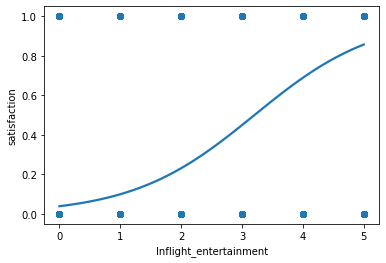

In [67]:
sns.regplot(x=X_train, y=y_train, logistic=True, ci=None)


**Question:** What can be told from the graph?

- The graph seems to indicate that the higher the `Inflight_entertainment` value, the higher the customer `satisfaction`, though it is difficult to capture the changes w.r.t to`Inflight_entertainment` as it is categorical.    

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that the regression is completed, review and analyze your results.

In [68]:
y_pred = classifier_mdl.predict(X_test)


In order to examine the predictions, print out `y_pred`. 

In [69]:
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Use the `predict_proba` and `predict` functions on `X_test`

In [70]:
# Use predict_proba to output a probability.
classifier_mdl.predict_proba(X_test)[:, 1]


array([0.85741932, 0.44991598, 0.10010671, ..., 0.10010671, 0.23173775,
       0.44991598])

In [71]:
# Use predict to output 0's and 1's.
classifier_mdl.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [73]:
import sklearn.metrics as metrics 

acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Model Accuracy: {acc:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, f1-score: {f1:.3f}')

Model Accuracy: 0.802, Precision: 0.816, Recall: 0.822, f1-score: 0.819


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

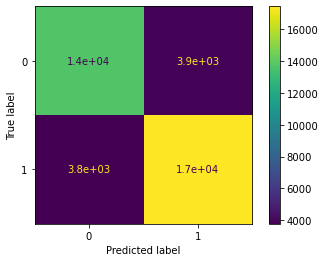

In [75]:
confusion_mat = metrics.confusion_matrix(y_test, y_pred, labels=classifier_mdl.classes_)
displ = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classifier_mdl.classes_)
displ.plot()

**Question:** What stands out about the confusion matrix?

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives. 

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Question:** Is there any difference in the number of false positives or false negatives that the model produced?

- The no. of false positives & false negatives are approximately equal, meaning that the model did not account better on any one of the class. 

**Question:** What do you think could be done to improve model performance?

- Instead of single independent variable, it is recommended to consider further examining the relationship btw 2 or more correlated variables in different contexts. For example, it would be helpful to include the age variables to gain better insights on what different age groups are most looking forward to. 

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 
